# Panel A : show how 2 different scenarios can be mapped to the same scenario

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.special import expit as sigmoid
from scipy.stats import spearmanr
from scipy.stats import pearsonr

from skbio.stats.composition import closure
from matplotlib import ticker

import seaborn as sns
%matplotlib inline

In [2]:
def plot_scenario(t, O, M, ototal, mtotal, steps=3, legend=True):
    fig, ax = plt.subplots(2, 1, figsize=(4.5, 9))

    gs = gridspec.GridSpec(2, 1)
    gs.update(wspace=0., hspace=.1)
    
    labelsize = 30
    ticksize = 20
    
    O = np.multiply(O, ototal.reshape(-1, 1))
    o1, o2 = O[:, 0], O[:, 1]

    M = np.multiply(M, mtotal.reshape(-1, 1))
    m1, m2 = M[:, 0], M[:, 1]

    colors = sns.color_palette("Paired")
    
    ototal = o1 + o2
    mtotal = m1 + m2
    ax = plt.subplot(gs[0])
    ax.plot(t, o1, label='microbe1', c=colors[0], lw=5)
    ax.plot(t, o2, label='microbe2', c=colors[1], lw=5)
    
    ax.yaxis.set_major_locator(plt.MaxNLocator(steps))


    #ax.plot(t, ototal, label='microbe total')
    #ax.set_ylabel('Microbes', fontsize=labelsize)
    ax.yaxis.set_tick_params(labelsize=ticksize)
    ax.set_xticks([])
    if legend:
        # Shrink current axis by 20%
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

        # Put a legend to the right of the current axis
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=24)

    ax = plt.subplot(gs[1])
    ax.plot(t, m1, label='metabolite1', c=colors[2], lw=5)
    ax.plot(t, m2, label='metabolite2', c=colors[3], lw=5)
    #ax.plot(t, mtotal, label='metabolite total')
    #ax.set_ylabel('Metabolites', fontsize=labelsize)
    ax.yaxis.set_tick_params(labelsize=ticksize)
    ax.set_xticks([])
    ax.set_xlabel('Time', fontsize=labelsize)
    #ax.yaxis.set_ticks(np.linspace(M.min(), M.max(), steps))
    ax.yaxis.set_major_locator(plt.MaxNLocator(steps))

    if legend:
        # Shrink current axis by 20%
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

        # Put a legend to the right of the current axis
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=24)
    #plt.tight_layout()        

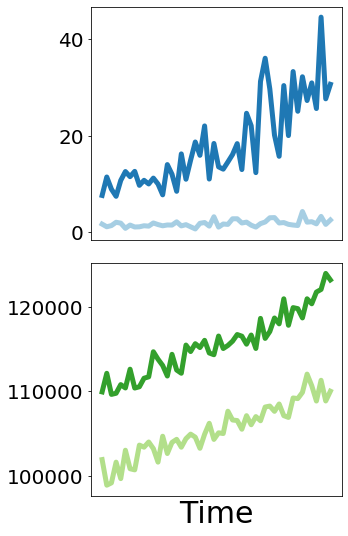

In [3]:
np.random.seed(0)
def noise(t, a=1e-3):
     return np.exp(np.random.randn(len(t))* a) 
    
n = 50
t = np.linspace(0, 1, n)
omax = 2e2
mmax = 7e2

#o1 = sigmoid(t-10) * (omax / 2)
#o2 = np.array([1] * n)  * (omax / 2)
#m1 = sigmoid(t-3) * (mmax / 2)
#m2 = np.array([1] * n) * (mmax / 2)

o1 = np.exp(t) * noise(t, 3e-1)
o2 = np.exp(t)*10 * noise(t, 3e-1)

m1 = np.exp(0.1*t)*10e4 * noise(t, 1e-2)
m2 = np.exp(0.1*t)*11e4 * noise(t, 1e-2)

ototal = o1 + o2
mtotal = m1 + m2

O = closure(np.vstack((o1, o2)).T)
M = closure(np.vstack((m1, m2)).T)

plot_scenario(t, O, M, ototal, mtotal, legend=False)

plt.savefig('figure1_1.png')

In [4]:
pearsonr(m1, o1)

(0.46279253637791706, 0.000714296216724773)

In [5]:
pearsonr(m2, o2)

(0.8087476777148236, 1.2089110742961763e-12)

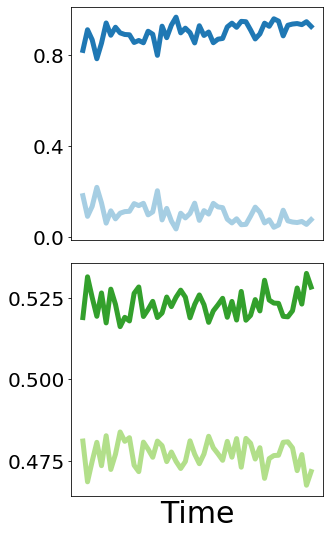

In [6]:
ototal = np.array([1] * n)
mtotal = np.array([1] * n)

O = closure(np.vstack((o1, o2)).T)
M = closure(np.vstack((m1, m2)).T)

plot_scenario(t, O, M, ototal, mtotal, legend=False)

plt.savefig('figure1_2.png')

In [7]:
pearsonr(M[:, 0], O[:, 0])

(0.19872445163907856, 0.1665129292571603)

In [8]:
pearsonr(M[:, 1], O[:, 1])

(0.1987244516390797, 0.1665129292571586)

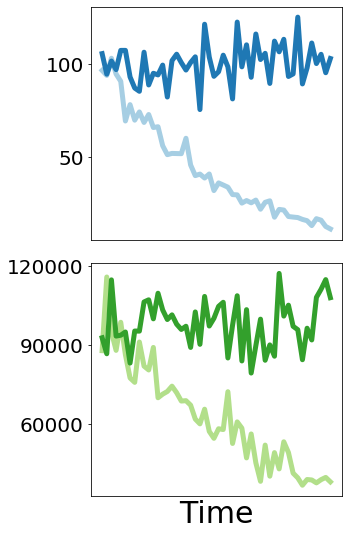

In [9]:
o1 = np.exp(-2*t)*100 * noise(t, 1e-1)
o2 = np.exp(-0.01*t)*100 * noise(t, 1e-1)

m1 = np.exp(-1*t)*10e4 * noise(t, 1e-1)
m2 = np.exp(-0.01*t)*10e4 * noise(t, 1e-1)

ototal = o1 + o2
mtotal = m1 + m2

O = closure(np.vstack((o1, o2)).T)
M = closure(np.vstack((m1, m2)).T)

plot_scenario(t, O, M, ototal, mtotal, legend=False)

plt.savefig('figure1_3.png')

In [10]:
pearsonr(m1, o1)

(0.9381809610020284, 9.332413754764141e-24)

In [11]:
pearsonr(m2, o2)

(0.18124488843526892, 0.20779828509797438)

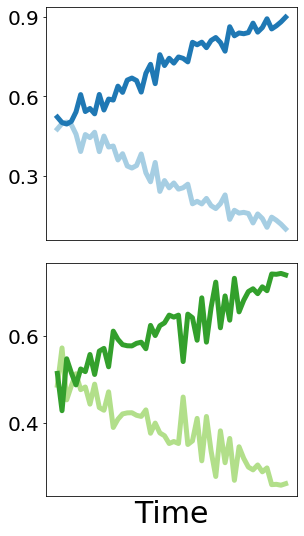

In [12]:
ototal = np.array([1] * n)
mtotal = np.array([1] * n)

O = closure(np.vstack((o1, o2)).T)
M = closure(np.vstack((m1, m2)).T)

plot_scenario(t, O, M, ototal, mtotal, legend=False)

plt.savefig('figure1_2.png')

In [13]:
pearsonr(M[:, 0], O[:, 0])

(0.8864776306362299, 1.1133901922286851e-17)

In [14]:
pearsonr(M[:, 1], O[:, 1])

(0.8864776306362301, 1.1133901922286358e-17)

# Panel B : Show how running Spearman on relative abundances can give upwards of 100% false positive rate.

Here, we will simulate 1 species that is growing very fast and is producing 1 molecule, and everything else is basically constant.

In [15]:
n = 30
t = np.linspace(0, 25, n)
omax = 2e2
mmax = 7e2
k1 = 20   #number of microbes
k2 = 100  # number of metabolites

ao = np.hstack((np.array([0.4]), np.random.normal(0.1, 0.01, size=(k1-1))))
am = np.hstack((np.array([0.2, -0.2]), np.random.normal(0, 0.01, size=(k2-2))))

e1 = np.random.normal(scale=0.3, size=(k1, n))
o = np.exp(np.outer(ao, t) + e1) 

e2 = np.random.normal(scale=0.3, size=(k2, n))
m = np.exp(np.outer(am, t) + e2) 

oids = ['microbe_%i' % i for i in range(o.shape[0])]
mids = ['metabolite_%i' % i for i in range(m.shape[0])]
sids = ['sample_%i' % i for i in range(m.shape[1])]

o = pd.DataFrame(o, index=oids)
m = pd.DataFrame(m, index=mids)

In [16]:
o_abs = o.T
m_abs = m.T

o_proportions = o_abs.apply(lambda x: x / x.sum(), axis=1)
m_proportions = m_abs.apply(lambda x: x / x.sum(), axis=1)

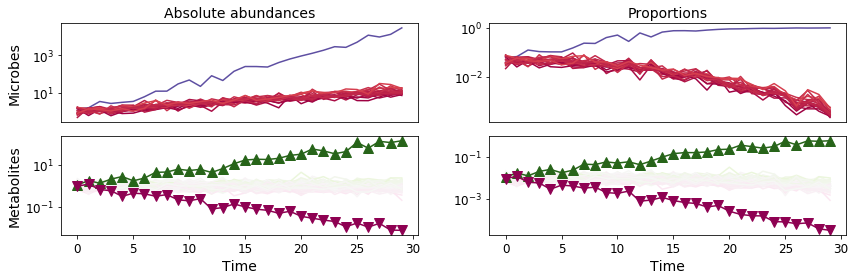

In [30]:
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

microbe_cmap = plt.cm.Spectral
metabolite_cmap = plt.cm.PiYG
oc = microbe_cmap((ao - ao.min()) / (ao.max() - ao.min()))
mc = metabolite_cmap((am - am.min()) / (am.max() - am.min()))

ticksize = 12
labelsize = 14

def plot_microbes(X, c, ax):
    for i, ci in enumerate(X.columns):
        ax.plot(X[ci], c=c[i])

        
def plot_metabolites(X, c, ax):

    for i in range(2, X.shape[1]):
        ax.plot(X.iloc[:, i], c=c[i])
    ax.plot(X['metabolite_0'], c=c[0], marker='^', markersize=10)
    ax.plot(X['metabolite_1'], c=c[1], marker='v', markersize=10)        
        
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(2, 2)
ax00 = plt.subplot(gs[0, 0])
ax10 = plt.subplot(gs[1, 0])
ax01 = plt.subplot(gs[0, 1])
ax11 = plt.subplot(gs[1, 1])

plot_microbes(o_abs, oc, ax00)
ax00.set_yscale('log')
ax00.tick_params(labelsize=ticksize)
ax00.set_xticks([])
ax00.set_title('Absolute abundances', fontsize=labelsize)
ax00.set_ylabel('Microbes', fontsize=labelsize, labelpad=10)

plot_metabolites(m_abs, mc, ax10)
ax10.set_yscale('log')
ax10.tick_params(labelsize=ticksize)
ax10.set_xlabel('Time', fontsize=labelsize)
ax10.set_ylabel('Metabolites', fontsize=labelsize)

plot_microbes(o_proportions, oc, ax01)
ax01.set_yscale('log')
ax01.tick_params(labelsize=ticksize)
ax01.set_xticks([])
ax01.set_title('Proportions', fontsize=labelsize)

plot_metabolites(m_proportions, mc, ax11)
ax11.set_yscale('log')
ax11.tick_params(labelsize=ticksize)
ax11.set_xlabel('Time', fontsize=labelsize)

#axs.legend(fontsize=12)
plt.tight_layout() 
plt.subplots_adjust(wspace=0.2)
fig.savefig('figure1.png')

In [18]:
from biom import Table

o_prop_table = Table(o_proportions.values.T, oids, sids)
m_prop_table = Table(m_proportions.values.T, mids, sids)

o_abs_table = Table(o_abs.values.T, oids, sids)
m_abs_table = Table(m_abs.values.T, mids, sids)

In [19]:
from biom.util import biom_open
with biom_open('../results/benchmark_output/scale_benchmark/microbe_abs.biom', 'w') as f:
    o_abs_table.to_hdf5(f, 'microbe_abs')
    
with biom_open('../results/benchmark_output/scale_benchmark/metabolite_abs.biom', 'w') as f:
    m_abs_table.to_hdf5(f, 'metabolite_abs')
    
with biom_open('../results/benchmark_output/scale_benchmark/microbe_rel.biom', 'w') as f:
    o_prop_table.to_hdf5(f, 'microbe_abs')
    
with biom_open('../results/benchmark_output/scale_benchmark/metabolite_rel.biom', 'w') as f:
    m_prop_table.to_hdf5(f, 'metabolite_abs')

In [20]:
import tensorflow as tf
from rhapsody.multimodal import MMvec
from tensorflow import set_random_seed
from scipy.sparse import coo_matrix

with tf.Graph().as_default(), tf.Session() as session:
    set_random_seed(0)
    model = MMvec(latent_dim=1, u_scale=0.5, v_scale=0.5, 
                  learning_rate=1e-1, batch_size=100)
    model(session,
          coo_matrix(o_abs.values), m_abs.values,
          coo_matrix(o_abs.values), m_abs.values)
    model.fit(epoch=5000, summary_interval=1)
    vdim = model.V.shape[0]
    V = np.hstack((np.zeros((vdim, 1)), model.V))
    Vbias = np.hstack((np.zeros(1), model.Vbias.ravel()))
    modelU = np.hstack(
        (np.ones((model.U.shape[0], 1)), model.Ubias, model.U))
    modelV = np.vstack(
        (Vbias, np.ones((1, V.shape[1])), V))
    abs_ranks = modelU @ modelV
    
with tf.Graph().as_default(), tf.Session() as session:
    set_random_seed(0)
    model = MMvec(latent_dim=1, u_scale=0.5, v_scale=0.5, 
                  learning_rate=1e-1, batch_size=100)
    model(session,
          coo_matrix(o_proportions.values), m_proportions.values,
          coo_matrix(o_proportions.values), m_proportions.values)
    model.fit(epoch=5000, summary_interval=1)
    vdim = model.V.shape[0]
    V = np.hstack((np.zeros((vdim, 1)), model.V))
    Vbias = np.hstack((np.zeros(1), model.Vbias.ravel()))
    modelU = np.hstack(
        (np.ones((model.U.shape[0], 1)), model.Ubias, model.U))
    modelV = np.vstack(
        (Vbias, np.ones((1, V.shape[1])), V))
    rel_ranks = modelU @ modelV  

/Users/jmorton/miniconda3/envs/rhapsody/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


Instructions for updating:
Use tf.random.categorical instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
Use tf.cast instead.


100%|██████████| 30000/30000 [00:19<00:00, 1525.94it/s]


In [21]:
abs_ranks = abs_ranks - abs_ranks.mean(axis=1).reshape(-1, 1)
rel_ranks = rel_ranks - rel_ranks.mean(axis=1).reshape(-1, 1)

(0.724750013865241, 0.0)

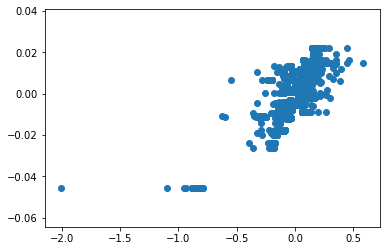

In [22]:
plt.scatter(abs_ranks.ravel(), rel_ranks.ravel())
pearsonr(abs_ranks.ravel(), rel_ranks.ravel())  

In [23]:
def plot_ranks(abs_ranks, rel_ranks, oc, axs):
    for i in range(1, abs_ranks.shape[0]):
        axs.scatter(abs_ranks[i, 2:], rel_ranks[i, 2:], 
                    facecolors='k')
        axs.scatter(abs_ranks[0, 2:], rel_ranks[0, 2:], 
                    facecolors='k')

    # negative metabolite
    for i in range(1, abs_ranks.shape[0]):
        axs.scatter(abs_ranks[i, 1], rel_ranks[i, 1], marker='v',
                    facecolors='r')
    axs.scatter(abs_ranks[1, 1], rel_ranks[1, 1], marker='v', 
                facecolors='r', label='- metabolite, - microbe')    
    axs.scatter(abs_ranks[0, 1], rel_ranks[0, 1], marker='v', 
                facecolors='r', label='- metabolite, + microbe')
    
    # positive metabolite
    for i in range(1, abs_ranks.shape[0]):
        axs.scatter(abs_ranks[i, 0], rel_ranks[i, 0], marker='^', 
                    facecolors='b')
    axs.scatter(abs_ranks[1, 0], rel_ranks[1, 0], marker='^', 
                facecolors='b', label='+ metabolite, - microbe')    
    axs.scatter(abs_ranks[0, 0], rel_ranks[0, 0], marker='^', 
                facecolors='b', label='+ metabolite, + microbe')    

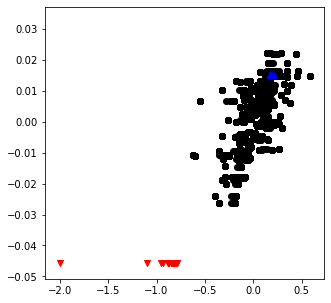

In [24]:
microbe_cmap = plt.cm.Spectral
metabolite_cmap = plt.cm.PiYG
oc = microbe_cmap((ao - ao.min()) / (ao.max() - ao.min()))
mc = metabolite_cmap((am - am.min()) / (am.max() - am.min()))

fig, ax = plt.subplots(figsize=(5, 5))
plot_ranks(abs_ranks, rel_ranks, oc, ax)

In [25]:
!ls ../results/benchmark_output/scale_benchmark/abs

abs_mmvec.txt                      edgelist_abs_fixed_SEmultitest.csv
abs_pearson.txt                    prop_matrix_abs_PHI.csv
abs_spearman.txt                   prop_matrix_abs_RHO.csv
cor_matrix_abs_SparCC.csv          weights_matrix_abs_SPIECEASI.csv


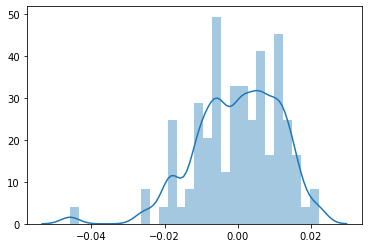

In [26]:
sns.distplot(rel_ranks.ravel())